In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("compas.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [6]:
df = {
    'sex':["male", "female"],
    'count':[5800, 1400]
}
data2 = pd.DataFrame(df)

<Axes: >

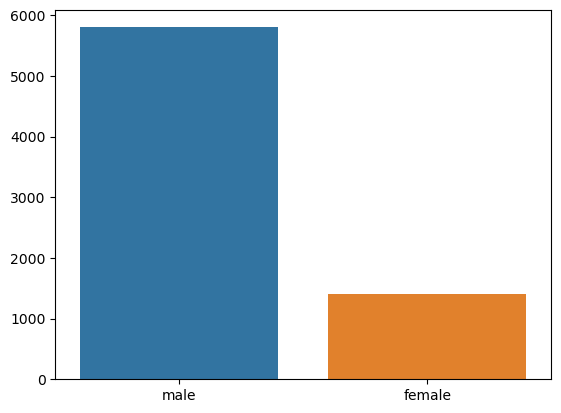

In [7]:
sns.barplot(x='sex', y='count', data=df)

In [8]:
countOlder45 = 0
countYounger25 = 0
count2545 = 0

for i in data["age"]:
    if i > 45:
        countOlder45 += 1
    if i < 25:
        countYounger25 += 1
    if i >= 25 and i<=45:
        count2545 += 1


In [9]:
print(countOlder45)

1463


In [10]:
print(countYounger25)

1529


In [11]:
print(count2545)

4222


<Axes: xlabel='categories', ylabel='ages'>

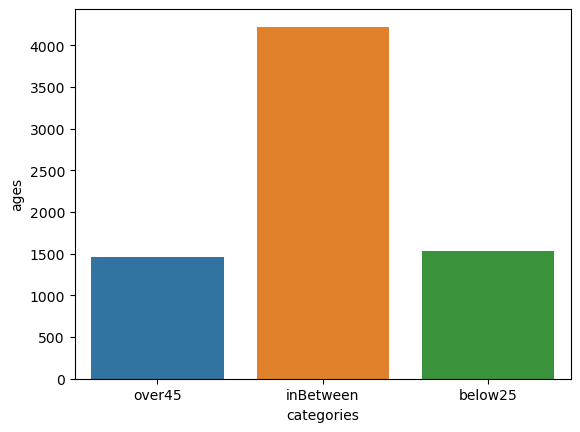

In [12]:
criminalAge = {
    'categories':["over45", "inBetween", "below25"],
    'ages':[1463, 4222, 1529]
}
criminalAgeDf = pd.DataFrame(criminalAge)
sns.barplot(x = 'categories', y = 'ages', data = criminalAgeDf)

<Axes: xlabel='categories', ylabel='ages'>

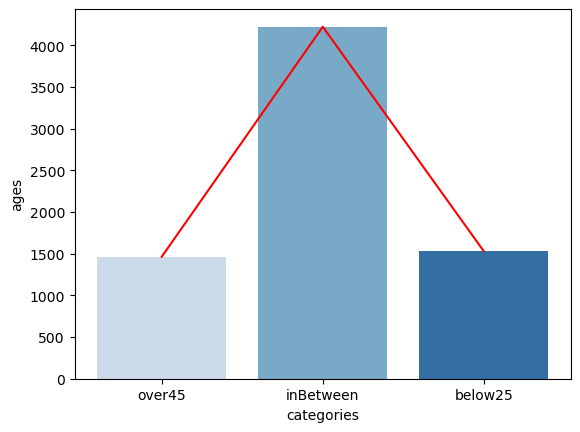

In [13]:
sns.barplot(data=criminalAgeDf, x='categories', y='ages', palette="Blues")
sns.lineplot(data=criminalAgeDf, x='categories', y='ages', color='red')

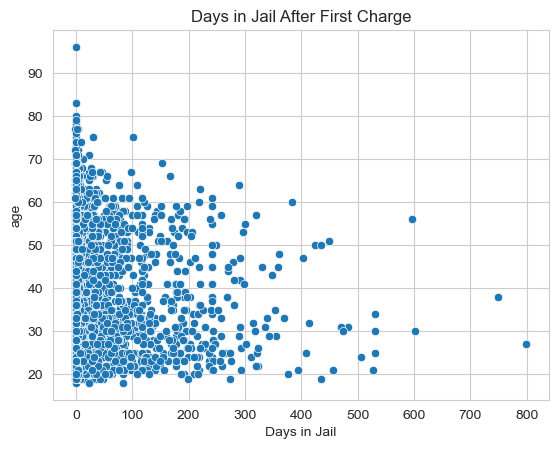

In [14]:
data["c_jail_in"] = pd.to_datetime(data["c_jail_in"])
data["c_jail_out"] = pd.to_datetime(data["c_jail_out"])
data["total_time_jail"] = (data["c_jail_out"] - data["c_jail_in"]).dt.days
sns.set_style("whitegrid")
sns.scatterplot(data=data, x="total_time_jail", y="age")
ax = plt.gca()
ax.set_xlabel("Days in Jail")
ax.set_title("Days in Jail After First Charge")
plt.show()

In [15]:
unique_values = data['race'].unique()
unique_values

array(['Other', 'African-American', 'Caucasian', 'Hispanic',
       'Native American', 'Asian'], dtype=object)

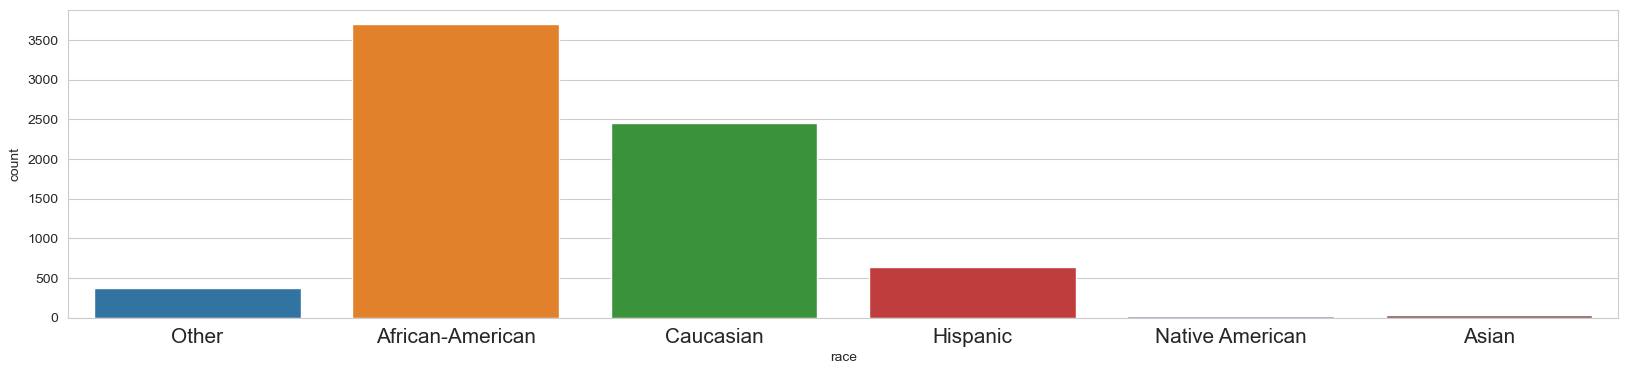

In [16]:
count = data['race'].value_counts()["Caucasian"]
plt.figure(figsize=(20, 4))
sns.countplot(x=data["race"])
plt.xticks(fontsize=15)
plt.show()

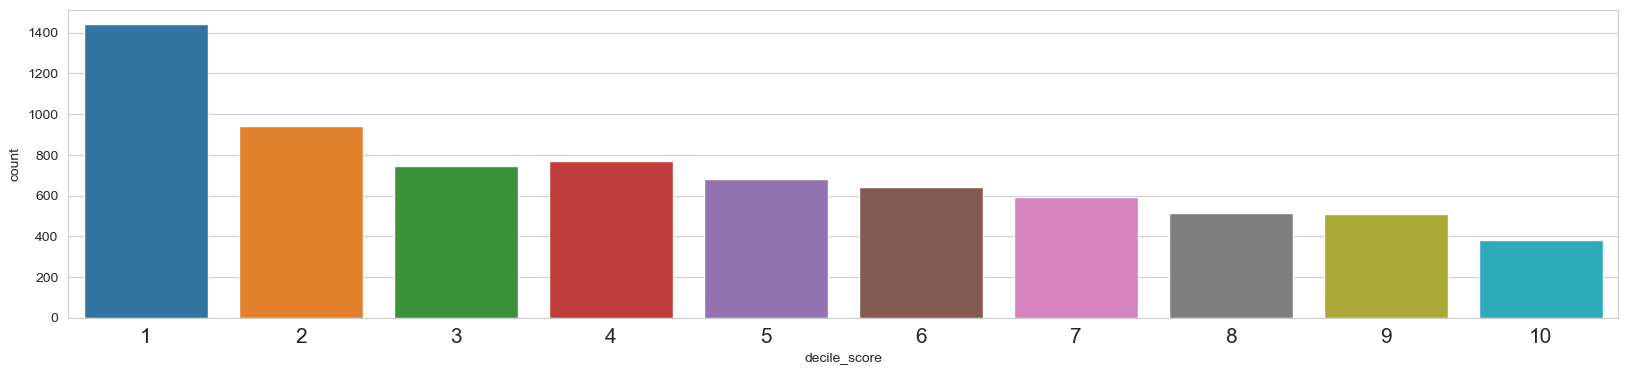

In [17]:
counts = data["decile_score"].value_counts()
plt.figure(figsize=(20, 4))
sns.countplot(x=data["decile_score"])
plt.xticks(fontsize=15)
plt.show()

<Axes: xlabel='decile_score', ylabel='count'>

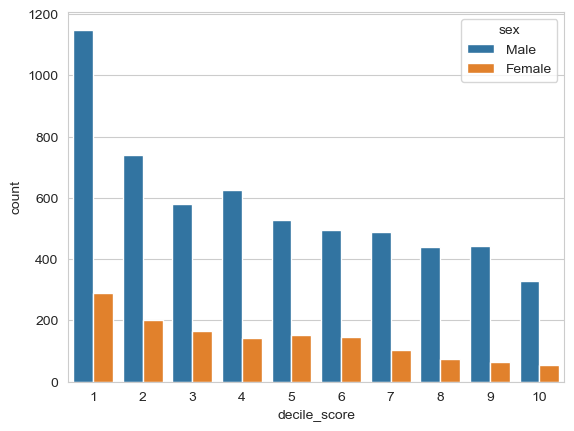

In [20]:
sns.countplot(x="decile_score", hue="sex", data=data)

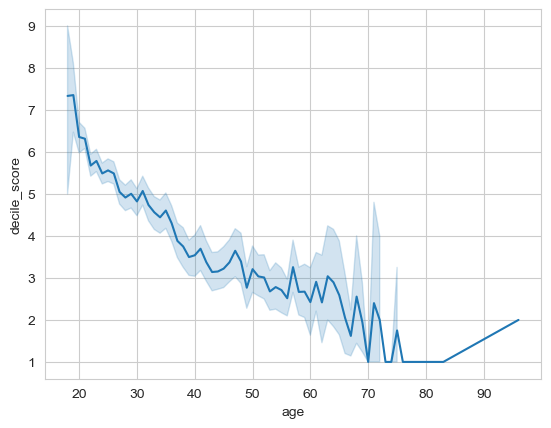

In [30]:
sns.lineplot(x="age", y="decile_score", data=data)

<Axes: xlabel='decile_score', ylabel='count'>

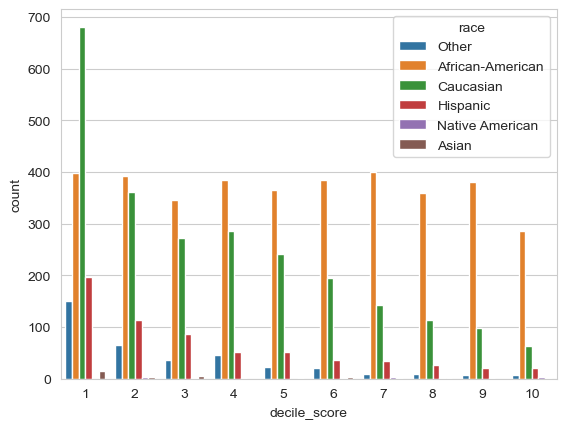

In [31]:
sns.countplot(x="decile_score", hue="race", data=data)

<Axes: xlabel='decile_score', ylabel='total_time_jail'>

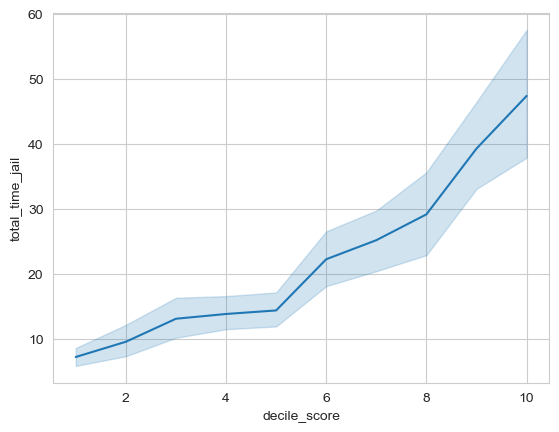

In [33]:
sns.lineplot(x="decile_score", y="total_time_jail", data=data)